In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fh = open("gm.txt", "r")
data = np.array([np.array(list(map(lambda x: int(float(x)), line.split()))) for line in fh.readlines()])
fh.close()

In [3]:
for i in range(data.shape[0]):
    if data[i, 3] > 0:
        start = i
        break
end = data.shape[0] - 1

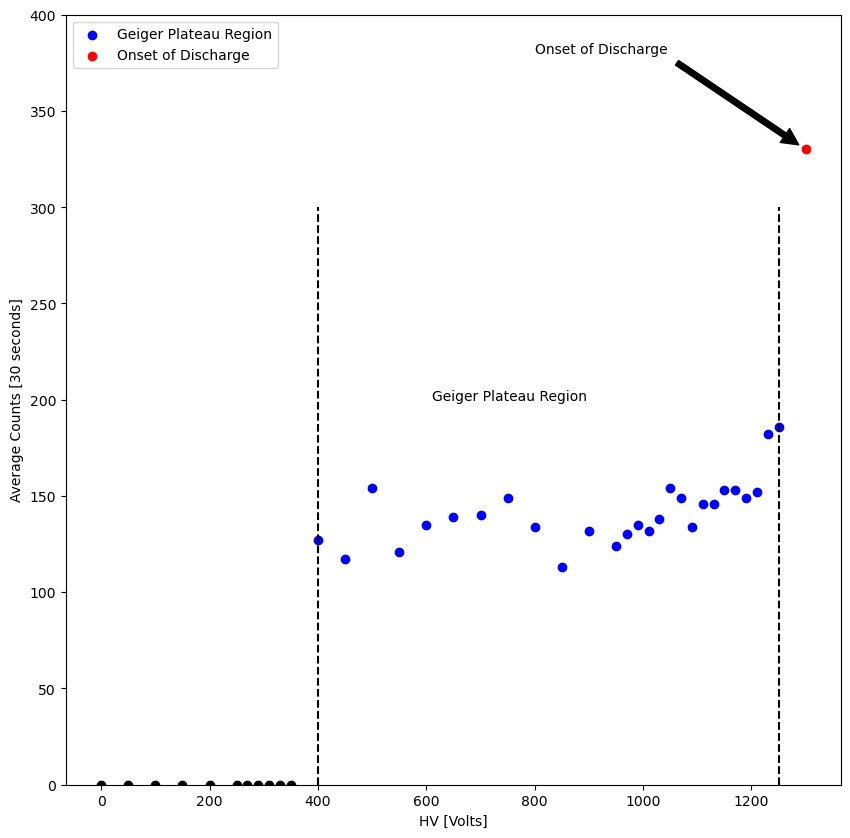

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(data[:start, 0], data[:start, 3], color="k")
ax.scatter(data[start:end, 0], data[start:end, 3], color="b", label="Geiger Plateau Region")
ax.scatter(data[-1, 0], data[-1, 3], color="r", label="Onset of Discharge")
ax.legend(loc="upper left")
ax.set_xlabel("HV [Volts]")
ax.set_ylabel("Average Counts [30 seconds]")
ax.annotate('Onset of Discharge', xy=(data[-1, 0], data[-1, 3]), xytext=(data[-1, 0] - 500, data[-1, 3] + 50), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Geiger Plateau Region', xy = (610, 200), xytext=(610, 200))
ax.set_ylim(0, 400)
ax.vlines(data[start, 0], ymin = 0, ymax=300, linestyle='--', color="k")
ax.vlines(data[end - 1, 0], ymin = 0, ymax=300, linestyle='--', color="k")
fig.savefig("gm.png", dpi=150)

In [5]:
fh = open("stats.txt", "r")
data2 = np.array([int(line) for line in fh.readlines()])
fh.close()

In [6]:
std = np.std(data2, ddof=1)
mean = np.mean(data2)
(std, mean)

(8.53134922494619, 71.4)

In [7]:
def gaussian(x):
    return np.exp(-(((x-mean)/std)**2)/2)

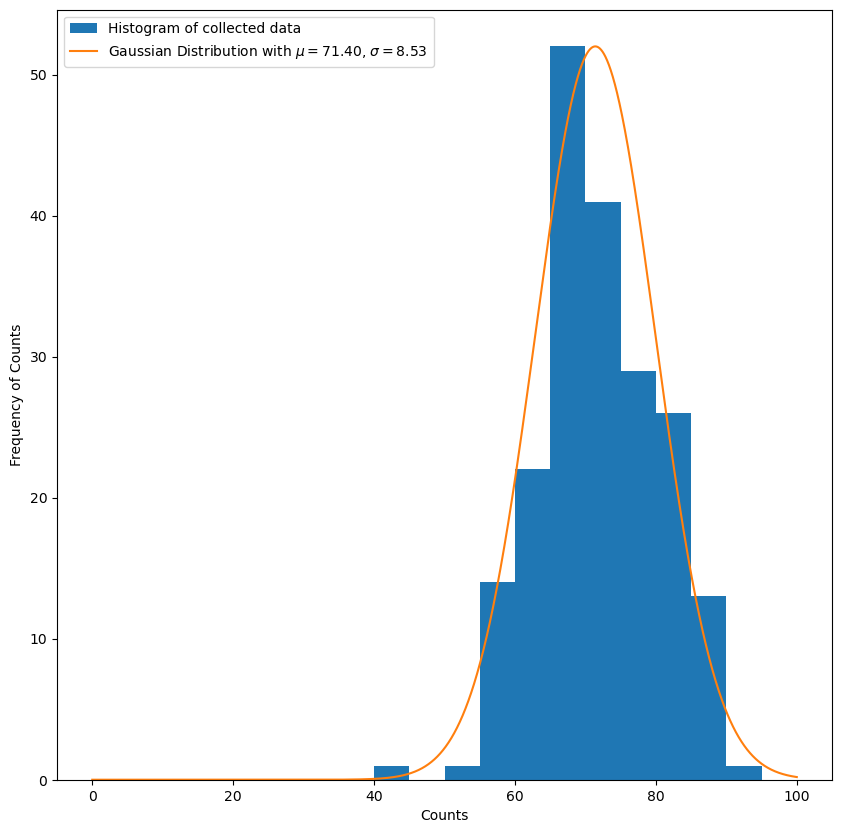

In [8]:
xs = np.linspace(0, 100, 2000)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bins = np.arange(40, 105, 5)
heights = ax.hist(data2, bins=bins, label="Histogram of collected data")[0]
A = np.max(heights)
ax.plot(xs, A*gaussian(xs), label=r"Gaussian Distribution with $\mu = {:.2f}$, $\sigma = {:.2f}$".format(mean, std))
ax.set_xlabel("Counts")
ax.set_ylabel("Frequency of Counts")
ax.legend()
fig.savefig("stats.png")

In [14]:
dic = {}
for i in sorted(data2):
    if i in dic:
        dic[i] += 1
    else:
        dic[i] = 1
    

In [15]:
dic

{41: 1,
 51: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 10,
 60: 5,
 61: 2,
 62: 5,
 63: 3,
 64: 7,
 65: 14,
 66: 12,
 67: 7,
 68: 7,
 69: 12,
 70: 7,
 71: 14,
 72: 8,
 73: 3,
 74: 9,
 75: 7,
 76: 3,
 77: 9,
 78: 9,
 79: 1,
 80: 5,
 81: 5,
 82: 4,
 83: 10,
 84: 2,
 85: 2,
 86: 2,
 87: 5,
 88: 1,
 89: 3,
 93: 1}

In [18]:
import pandas as pd
d = pd.DataFrame.from_dict(dic, orient='index').to_csv("stats2.csv")

In [17]:
d

,0
41,1
51,1
55,1
56,1
57,1
58,1
59,10
60,5
61,2
62,5
